In [1]:
import os
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import Sequential

In [3]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tqdm import tqdm

In [4]:
#import dataset
emotions = pd.read_csv("C:/Users/nyein/CZ4041/emotions/emotions.csv")

In [5]:
#train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(emotions, random_state=42, test_size=0.20, shuffle=True)
x_train = train.iloc[:,0:72]
y_train = train.iloc[:,-6:]
x_test = test.iloc[:,0:72]
y_test = test.iloc[:,-6:]

In [6]:
print("printing shape of input: {}".format(x_train.shape))
print("printing shape of target labels: {}".format(y_train.shape))

printing shape of input: (474, 72)
printing shape of target labels: (474, 6)


In [7]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler(feature_range=(0,1))
x_scaled_train =  x_scaler.fit_transform(x_train)
x_scaled_test = x_scaler.fit_transform(x_test)
print("printing shaped of scaled data: {}".format(x_scaled_train.shape))

printing shaped of scaled data: (474, 72)


In [8]:
#build model
model = Sequential()
model.add(Dense(50,input_dim=72,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(100,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(50,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(6, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                3650      
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5

In [10]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
history = model.fit(x_scaled_train, y_train, batch_size=20,epochs=100,shuffle=True, verbose=0,validation_data=(x_scaled_test, y_test))

In [12]:
def model_visualization(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['acc'])
  plt.plot(epoch_range, history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

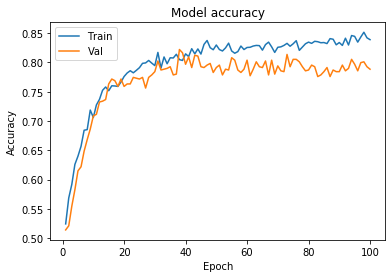

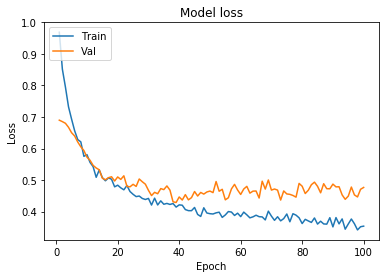

In [13]:
model_visualization(history, 100)

In [15]:
y_pred = model.predict(x_scaled_train, batch_size=20, verbose=0)

In [16]:
y_pred

array([[0.2799866 , 0.30077448, 0.28011477, 0.01702675, 0.12360966,
        0.57457525],
       [0.3992009 , 0.8392061 , 0.6516677 , 0.02380556, 0.02855062,
        0.03367126],
       [0.6828936 , 0.35007805, 0.06744316, 0.00740692, 0.04968968,
        0.42626712],
       ...,
       [0.66337025, 0.29727393, 0.04163763, 0.01148349, 0.19281286,
        0.5849799 ],
       [0.01444259, 0.0469431 , 0.61648643, 0.95809656, 0.8112284 ,
        0.01934871],
       [0.3059768 , 0.08253101, 0.04121819, 0.00117254, 0.06350765,
        0.90196157]], dtype=float32)

In [18]:
emotions

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2,0.245457,0.105065,0.405399,0,1,1,0,0,0
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2,0.343547,0.276366,0.710924,1,0,0,0,0,1
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3,0.188693,0.045941,0.457372,0,1,0,0,0,1
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2,0.102839,0.241934,0.351009,0,0,1,0,0,0
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2,0.195196,0.310801,0.683817,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.027142,0.047551,0.072043,-79.881347,8.119313,1.927310,1.696017,0.397888,0.857559,0.302742,...,2,0.261742,0.002657,1.149211,0,0,1,1,1,0
589,0.094829,0.204498,0.082824,-61.364436,2.966229,0.627740,1.440352,0.856243,1.110282,0.394450,...,2,0.282122,0.052218,0.335371,1,0,0,0,1,1
590,0.035169,0.065403,0.075227,-81.750533,10.311701,0.092224,0.818851,1.569606,1.831909,0.057216,...,2,0.184313,0.247136,0.476993,0,0,1,1,1,0
591,0.054276,0.238158,0.095935,-71.009724,3.181340,1.547197,2.407780,0.618838,0.997950,0.825143,...,2,0.547126,0.183494,1.255820,0,1,1,0,0,0
